In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("customers.csv")
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
5,6,Female,22,17,76,3
6,7,Female,35,18,6,4
7,8,Female,23,18,94,3
8,9,Male,64,19,3,4
9,10,Female,30,19,72,3


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
 5   cluster                 200 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 9.5+ KB


In [7]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0
cluster,0


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.500,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.850,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.560,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.200,25.823522,1.0,34.75,50.0,73.00,99.0
cluster,200.0,2.245,1.814230,0.0,1.00,2.0,4.00,5.0


In [9]:
df.tail(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
190,191,Female,34,103,23,2
191,192,Female,32,103,69,1
192,193,Male,33,113,8,2
193,194,Female,38,113,91,1
194,195,Female,47,120,16,2
195,196,Female,35,120,79,1
196,197,Female,45,126,28,2
197,198,Male,32,126,74,1
198,199,Male,32,137,18,2
199,200,Male,30,137,83,1


In [10]:
df.shape

(200, 6)

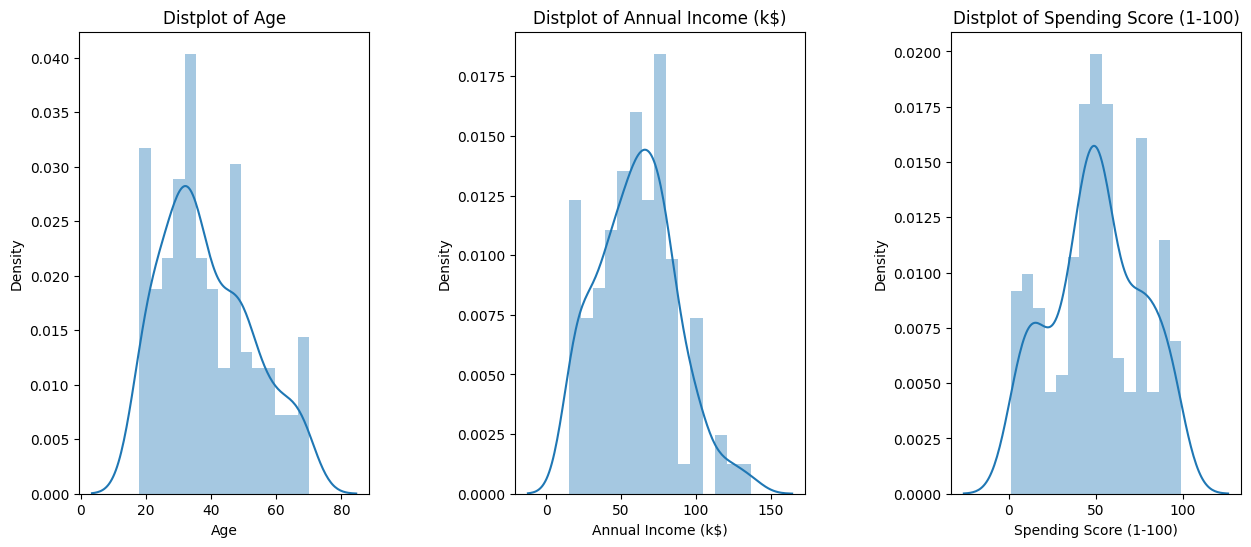

In [16]:
plt.figure(figsize = (15,6))
n = 0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
  n += 1
  plt.subplot(1 ,3, n)
  plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
  sns.distplot(df[x], bins = 15)
  plt.title("Distplot of {}".format(x))
plt.show()

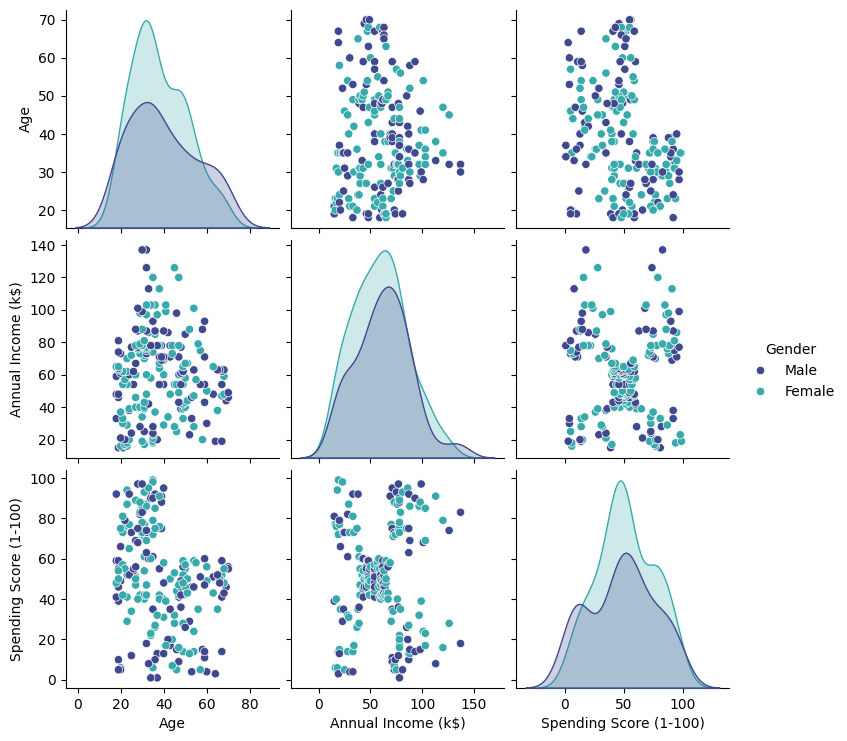

In [18]:
sns.pairplot(df, vars = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], hue = 'Gender', palette = 'mako')

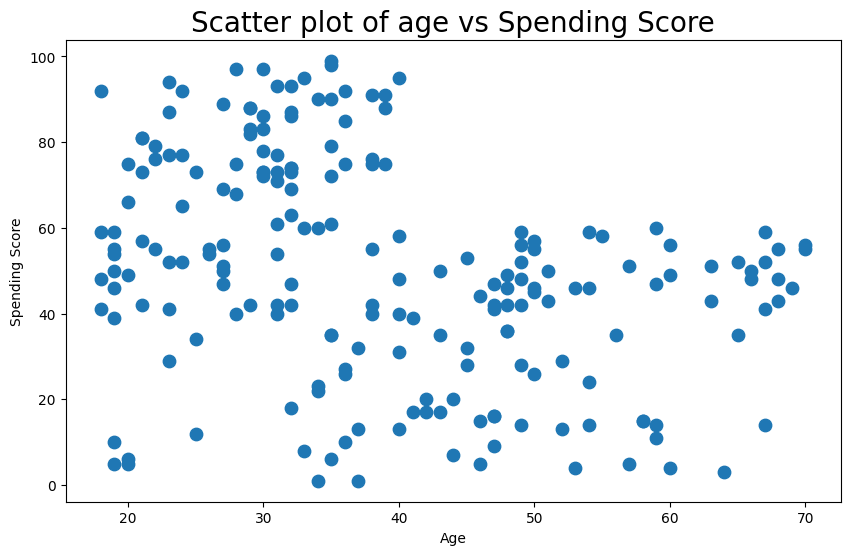

In [22]:
plt.figure(figsize = (10,6))
plt.scatter(data = df, x = 'Age', y = 'Spending Score (1-100)', s = 80)
plt.title('Scatter plot of age vs Spending Score', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

In [25]:
x1 = df[['Age', 'Spending Score (1-100)']].iloc[:, :].values
inertia = []
for n in range(1, 15):
  algorithm = (KMeans(n_clusters = n, init = 'k-means++', n_init = 10, max_iter = 300, tol = 0.0001, random_state = 42, algorithm = 'elkan'))
  algorithm.fit(x1)
  inertia.append(algorithm.inertia_)

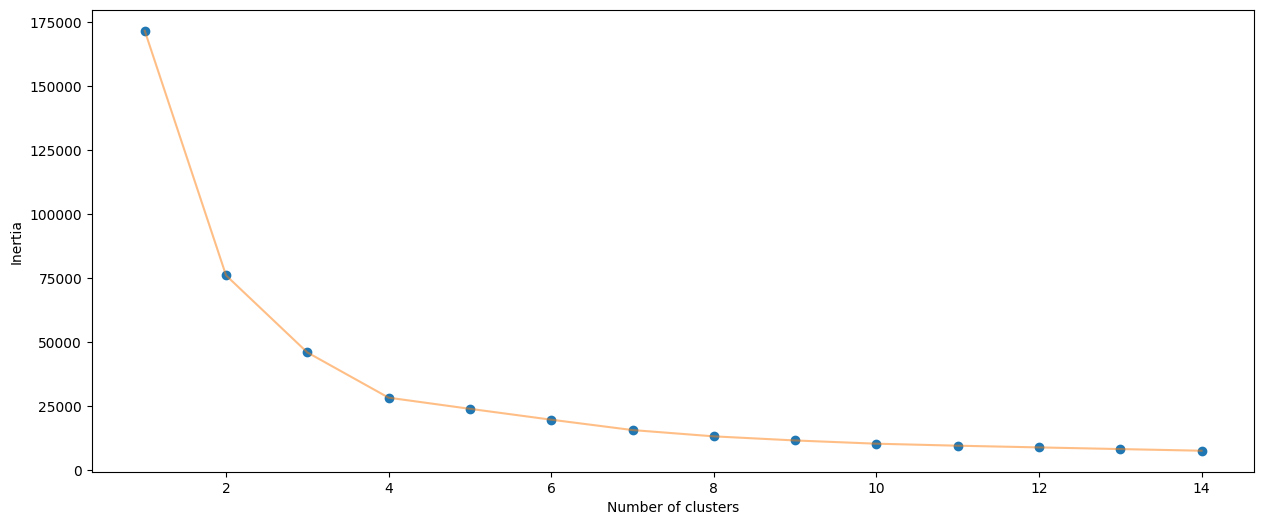

In [26]:
plt.figure(1, figsize = (15,6))
plt.plot(np.arange(1, 15), inertia, 'o')
plt.plot(np.arange(1, 15), inertia, '-', alpha = 0.5)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [27]:
algorithm = (KMeans(n_clusters = n, init = 'k-means++', n_init = 10, max_iter = 300, tol = 0.0001, random_state = 42, algorithm = 'elkan'))
algorithm.fit(x1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [30]:
h = 0.02
x_min, x_max = x1[:, 0].min() - 1, x1[:, 0].max() + 1
y_min, y_max = x1[:, 1].min() - 1, x1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

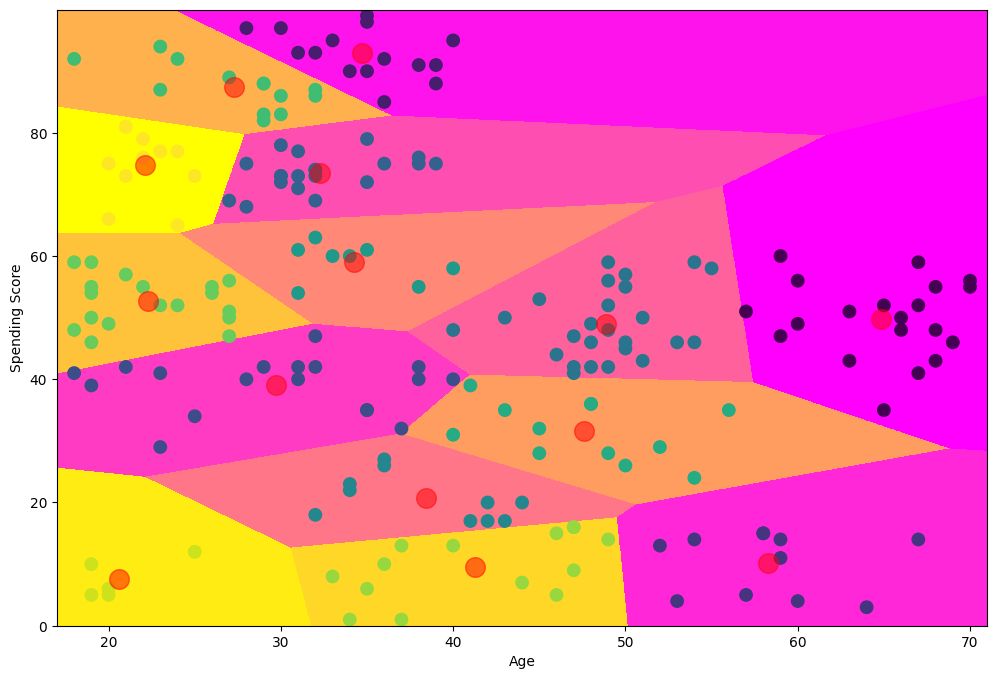

In [41]:
plt.figure(1, figsize = (12,8))
plt.clf
Z = Z.reshape(xx.shape)
plt.imshow(Z, interpolation = 'nearest', extent = (xx.min(), xx.max(), yy.min(), yy.max()), cmap = plt.cm.spring, aspect = 'auto', origin = 'lower')
plt.scatter(x = 'Age' , y = 'Spending Score (1-100)', data = df, c = labels1, s = 80)
plt.scatter(x = centroids1[:, 0], y = centroids1[:, 1], s = 200, c = 'red', alpha = 0.5)
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

In [32]:
centroids1

array([[64.85      , 49.85      ],
       [34.73333333, 92.93333333],
       [58.27272727, 10.18181818],
       [29.72222222, 39.05555556],
       [32.25      , 73.55      ],
       [48.88      , 48.96      ],
       [38.4       , 20.7       ],
       [34.25      , 59.        ],
       [47.58333333, 31.58333333],
       [27.30769231, 87.46153846],
       [22.27777778, 52.72222222],
       [41.28571429,  9.57142857],
       [20.6       ,  7.6       ],
       [22.09090909, 74.81818182]])